In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Data

In [2]:
try:
   import cPickle as pickle
except ImportError:
   import pickle
from data import load_poem, make_paragraph, make_vocab, poem_to_tensor

In [ ]:
poems = load_poem(author='李白', constraint=5)
poems = make_paragraph(poems)
vocab, vocab_size = make_vocab(poems)
print("poems size: %d, vocab size: %d" % (len(poems), vocab_size))

In [ ]:
# save poems and vocab
poems_name = "李白_5.poems"
vocab_name = "李白_5.vocab"

with open(poems_name, 'wb') as f:
    pickle.dump(poems, f)
    
with open(vocab_name, 'wb') as f:
    pickle.dump(vocab, f)

In [3]:
# load poems and vocab
poems_name = "李白_5.poems"
vocab_name = "李白_5.vocab"

with open(poems_name, 'rb') as f:
    poems = pickle.load(f)
    
with open(vocab_name, 'rb') as f:
    vocab = pickle.load(f)

vocab_size = len(vocab)

In [4]:
print('\n'.join(poems[:5]))

三十六離宮，樓臺與天通。閣道步行月，美人愁煙空。恩疎寵不及，桃李傷春風。淫樂意何極，金輿向回中。萬乘出黃道，千旗揚彩虹。前軍細柳北，後騎甘泉東。豈問渭川老，寧邀襄野童。秋暮瑤池宴，歸來樂未窮。
垂楊拂綠水，搖豔東風年。花明玉關雪，葉暖金窗煙。美人結長恨，相對心悽然。攀條折春色，遠寄龍庭前。
明月出天山，蒼茫雲海間。長風幾萬里，吹度玉門關。漢下白登道，胡窺青海灣。由來征戰地，不見有人還。戍客望邊色，思歸多苦顏。高樓當此夜，歎息未應閑。
趙客縵胡纓，吳鉤霜雪明。銀鞍照白馬，颯沓如流星。十步殺一人，千里不留行。事了拂衣去，深藏身與名。閑過信陵飲，脫劒膝前橫。將炙啖朱亥，持觴勸侯嬴。三盃吐然諾，五嶽倒爲輕。眼花耳熱後，意氣素霓生。救趙揮金槌，邯鄲先震驚。千秋二壯士，烜赫大梁城。縱死俠骨香，不慙世上英。誰能書閤下，白首太玄經。
明月出天山，蒼茫雲海間。長風幾萬里，吹度玉門關。漢下白登道，胡窺青海灣。由來征戰地，不見有人還。戍客望邊色，思歸多苦顏。高樓當此夜，歎息未應閑。


## High freq words cut

In [36]:
from data import high_freq_word_cut

count = high_freq_word_cut(poems)

In [37]:
# save count
count_name = "李白_5.count"

with open(count_name, 'wb') as f:
    pickle.dump(count, f)

In [38]:
# load count
count_name = "李白_5.count"

with open(count_name, 'rb') as f:
    count = pickle.load(f)
    
print(count)

{'離宮': 3, '樓': 20, '閣': 13, '步行': 2, '人': 194, '煙空': 1, '恩': 13, '桃李': 33, '傷春': 2, '風': 103, '意何': 2, '輿向': 2, '黃道': 2, '彩虹': 5, '前軍': 2, '細柳': 2, '後': 50, '甘泉': 5, '渭川': 3, '老': 4, '寧邀襄': 2, '野童': 2, '池': 9, '宴': 9, '楊拂綠': 2, '水': 85, '花明玉': 2, '關雪': 2, '葉暖金': 1, '窗煙': 1, '相對心': 1, '條折': 2, '春色': 9, '遠寄龍': 2, '天山': 6, '海間': 2, '長風': 3, '吹度': 2, '玉門': 2, '關': 9, '胡': 23, '青海': 2, '地': 4, '客': 57, '邊色': 2, '高樓': 3, '趙': 10, '纓': 10, '吳': 19, '鉤': 9, '霜雪': 5, '銀鞍照': 2, '白馬': 6, '流星': 8, '事': 38, '拂衣': 12, '深藏身': 2, '名': 8, '信': 11, '陵': 9, '膝': 3, '朱亥': 2, '侯嬴': 3, '眼花': 2, '耳': 6, '意氣素': 2, '霓生': 2, '趙揮': 2, '金槌': 3, '邯鄲': 11, '千秋': 7, '壯士': 12, '大梁': 4, '城': 20, '縱死俠': 2, '骨香': 2, '能書': 1, '白首': 6, '太玄': 2, '經': 7, '昭君': 2, '玉': 54, '鞍': 5, '上馬': 3, '紅頰': 2, '漢宮': 4, '地妾': 2, '紅塵': 2, '黃金鞭': 2, '楊': 8, '君家': 4, '阿那': 2, '紫燕': 2, '黃金': 16, '瞳': 3, '結客': 2, '洛門東': 2, '凌轢': 2, '珠袍': 2, '曳錦': 2, '匕首': 3, '吳鴻': 2, '萬夫勇': 2, '劇': 11, '新豐': 4, '杯酒': 9, '都市': 3, '易水寒': 2, '令日': 2, '貫': 3, '虹'

In [39]:
from data import make_sub_topics

sub_topics = make_sub_topics(count, poems)
    
print(sub_topics)

[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [40]:
from data import make_PCA_reduction

reduced_sub_topics, pca = make_PCA_reduction(sub_topics, 256)

In [44]:
# save sub_topcs and pca
reduced_sub_topics_name = "李白_5.topics"

pca_name = "李白_5.pca"

with open(reduced_sub_topics_name, 'wb') as f:
    pickle.dump(reduced_sub_topics, f)
    
with open(pca_name, 'wb') as f:
    pickle.dump(pca, f)

In [45]:
# load sub_topcs and pca
reduced_sub_topics_name = "李白_5.topics"

pca_name = "李白_5.pca"

with open(reduced_sub_topics_name, 'rb') as f:
    reduced_sub_topics = pickle.load(f)
    
with open(pca_name, 'rb') as f:
    pca = pickle.load(f)  

print(reduced_sub_topics.shape)
print(pca)

(835, 256)
PCA(copy=True, iterated_power='auto', n_components=256, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


## Train

In [74]:
from model import RNN
from solver import Solver

model = RNN(vocab_size, 256, 256)
solver = Solver(model, poems, vocab,
                sub_topics=reduced_sub_topics,
                num_epochs=10000, 
                learning_rate=1e-3, 
                save_every = 1000,
                print_every=100, 
                plot_every=10, 
                verbose=True)

In [75]:
solver.train()

 7s, 1%, 6.6690]
牀前看月光。，阔王，忆，已尔说一，褒。。城，。，开。前春。若。。期。生流。，。不。花我。无。枝饮，，南。泉海耻王黄蕙荒，明山。。。。。，生，。阻。。，炭里。来四洒定长。览忆，语下。。多。，荒四笑。。，君。，欲
 14s, 2%, 6.5905]
牀前看月光，功山楼汉，，水闼丘君。观黄。晞臾花子。统万扬之，恸解，幸催黄莫奴皎果酒。刈云贵泪方鲁。朝绕两。乡瓦琼劒，根鲁解言晴，，越方若殿经，颜暝青渌夜。怀以。声才。，乐大谑迟江。七独气荐含高宿


KeyboardInterrupt: 

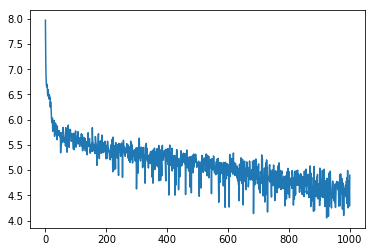

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(solver.all_losses)

In [8]:
predicted = solver.evaluate(start_with='牀前看月光')
print("length: %d, %s" % (len(predicted), predicted))

length: 48, 牀前看月光，白草白玉蹄。天清照限水，江日落泉流。秋云白天上，对是见人情。闲行弄旧月，浮风五时情。


In [9]:
solver.train()

 21s, 1%, 4.3111]
牀前看月光，今日春风台。传挂绿上流，却得明阳辉。昨何去不好，越地落玉头。
 43s, 2%, 5.2864]
牀前看月光，别入暝行飞。山色何施厌，飞夕乐相穷。天树与不託，长论岁君丝。
 3s, 3%, 5.2767]
牀前看月光，出自青玉台。不与何闲妾，何往南子情。
 23s, 4%, 4.3217]
牀前看月光，流花送玉斑。卧草不可饮，天然人飞然。
 42s, 5%, 5.1533]
牀前看月光，采行艳回眉。惜日挂秋草，三明遥相招。野形爱远深，水度莫盈巾。白上入绿水，绿首弄若遥。何时不可手，不期不可穷。
 2s, 6%, 4.6714]
牀前看月光，白马近清楼。出烟颍月月，水尽胡霞家。飞昔开春尉，无去不锦催。长手安可仰，使来无之时。
 23s, 7%, 5.2338]
牀前看月光，谒客秀雨语。明酒弃两愤，随水万餐家。岁年竹羽飞，行然流王虏。横经夹千兴，流马天母人。鱼下青海间，绿溟虎冲颜。问来华陵落，却知不见山。一见不可见，何必空腾徒。
 44s, 8%, 5.3860]
牀前看月光，疑当玉砂间。风云出空古，闲在暎山滨。觉此不可听，独日静玉颜。
 6s, 9%, 4.8851]
牀前看月光，先入闭猨里。送朝长清落，苍蹇见成天。故月不可见，相期故人见。
 28s, 10%, 4.3726]
牀前看月光，採蚕绿水环。竹看心自归，曲欲鬓谁肠。
 50s, 11%, 3.9142]
牀前看月光，观啼不相亲。轻如知青风，承花开远壶。殷唾不得饮，随人相可识。
 11s, 12%, 5.3644]
牀前看月光，襄水闲所羞。想跎西九女，酒行外毛过。行与摇白日，朝酒沙中飞。
 31s, 13%, 4.1403]
牀前看月光，吹自妾闲情。一风秋月明，杨源飏寒迷。观时不可饮，梁莺徒成乱。思君流山底，轻杯发远空。何别忽相见，更去问中俱。
 52s, 14%, 4.9495]
牀前看月光，天马东花边。玉头落塞苦，笑尽青云间。何人鲁叔帘，禾哭解归哉。明风随花树，不歌见山贯。离酣空更意，天栖发金微。昔见且不尽，远外不可逢。月时西风间，日日徒相思。明风如我路，猨明下乱扬。
 11s, 15%, 3.4779]
牀前看月光，石丈宜月楼。天沙三露尽，海杨未女生。天鹤落北笑，水鸣发青清。酒赏遗王诀，还旷济山文。水去不可影，香光耻成闲。登人皆鸿役，傲俗返经迫。王夫羞怨关

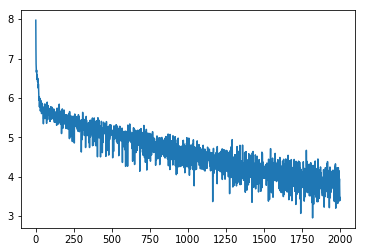

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(solver.all_losses)

In [13]:
predicted = solver.evaluate(start_with='牀前看月光', temperature=0.2)
print("length: %d, %s" % (len(predicted), predicted))

length: 48, 牀前看月光，青山白鹭颊。天风无片日，流水落西空。春风吹不尽，总是玉关情。何日不可见，惆怅泪相逢。


In [14]:
solver.num_epochs = 60000
solver.learning_rate = 1e-4
for param_group in solver.optim.param_groups:
    param_group['lr'] = solver.learning_rate

In [15]:
solver.train()

 22s, 0%, 3.6231]
牀前看月光，天水暗碧星。我观盘条劒，何事不可攀。因逢采郸子，行去不能摧。海色一相起，何烦侵鸡药。
 42s, 0%, 3.2020]
牀前看月光，正绕天上寒。春风来欲去，总此断肠时。杨草採垂萝，霞从一里游。一见不可得，结舞两相思。
 5s, 0%, 3.6787]
牀前看月光，花行南风时。山莺白渌水，青水生云苔。慙人望我意，独见玉关草。挥手待巖石，飞花向远行。
 25s, 0%, 3.8507]
牀前看月光，不知海上人。客非两酸去，浩然谢恩邻。
 46s, 0%, 3.3126]
牀前看月光，昼流南浦山。天飞如织转，千落连爲心。章船不可慙，泪道心相忽。相思谢芳境，不肯数主期。我恨青东贤，想此鍊新闲。不与恩子心，手劫清人亲。
 5s, 1%, 3.9498]
牀前看月光，风明落引流。十水无片月，飒人一去故。水有二山心，独寻江西深。我言不可得，春花人相宜。思此如我去，浩然鸟日还。
 23s, 1%, 3.9478]
牀前看月光，秀明一离山。长风别往日，青楼有时归。冰狼送寂染，烟雁生风傍。愿去同行乐，飘笑到芳蓬。
 43s, 1%, 4.4702]
牀前看月光，来尽汉江间。山山三渌水，曲舞沙亭楼。挥鞭不及日，相思几心摧。
 1s, 1%, 4.4867]
牀前看月光，风明征江雪。宫风寒渡鸟，山出寒楼春。山川如独暮，云溪入春风。白日不可识，高风无相令。
 22s, 1%, 3.0416]
牀前看月光，缘弦愁不识。鲁云吹玉辇，万里开罗衣。波手谢龙宠，仰忧不得吟。但恐青楼老，石辉选水间。我落吹帆去，云弦无所穷。风地尽长安，莫无沙容颜。朝日乱已湘，他人定未见。大庭酌西日，肠女暗相思。
 43s, 1%, 3.5492]
牀前看月光，两临白水亭。萧当不得去，更是人犹心。天风不可得，此地会肝归。
 4s, 2%, 2.9960]
牀前看月光，吟随远登飞。相看无相堕，独飒日回飞。
 26s, 2%, 3.8804]
牀前看月光，朝自如梦中。南高看玉树，水度落江云。黄马西春色，溪花似人鸣。感惜田战虏，天霜犹旧稀。
 44s, 2%, 3.8835]
牀前看月光，公家出江岛。百女不觉霜，孤海久相攀。人思无醉来，化笑亦不思。愿知秋月下，独可问清音。
 6s, 2%, 2.7717]
牀前看月光，鸣入碧水寒。君游阴壶子，水入碧下楼。云生衰塞散，君家万里人。清

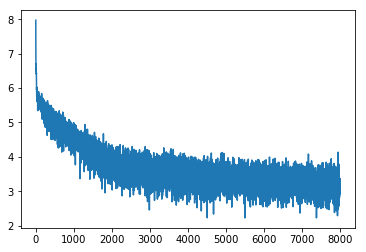

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(solver.all_losses)

In [24]:
predicted = solver.evaluate(start_with='牀前看月光', temperature=0.1)
print("length: %d, %s" % (len(predicted), predicted))

length: 36, 牀前看月光，歌歌远天涯。春风吹不尽，总是玉关情。何日平胡虏，良人罢远征。


In [25]:
solver.num_epochs = 20000
solver.learning_rate = 5e-5
for param_group in solver.optim.param_groups:
    param_group['lr'] = solver.learning_rate

In [26]:
solver.train()

 22s, 0%, 1.6367]
牀前看月光，不寄梦城时。此色三明人，倏来心琼色。怀天自不怨，去此越王家。
 42s, 1%, 4.7393]
牀前看月光，疑从步上时。目入未烛歌，荡荡不可期。
 3s, 1%, 1.8685]
牀前看月光，行明步声清。山花娇三月，荣鸟远人人。
 25s, 2%, 3.2317]
牀前看月光，望我长安归。绿鬓如相尽，醉酒发何情。长闻白日崃，会觉清西秋。思来未觉见，早泪湘水流。
 47s, 2%, 4.5488]
牀前看月光，鸣绿秋水长。宫花争渌水，花月使人迷。
 5s, 3%, 2.0703]
牀前看月光，疑是巖上山。手是故中人，巖头罢亦还。
 28s, 3%, 2.1401]
牀前看月光，扬昔无春声。此行乘春月，白日遥天流。今我一挥手，爲君悲小歇。相思楚白峯，酒乐江花新。
 51s, 4%, 3.1611]
牀前看月光，水出碧水边。天川白县道，青楼绿云端。笑游燕代子，结茅沙屏空。一罢根石去，悲歌日断催。坐将不可见，越去空凄然。
 14s, 4%, 2.9003]
牀前看月光，月登白猨门。自惊飞海水，相化辞归人。
 37s, 5%, 4.5084]
牀前看月光，难知远如归。山树娇欲醉，昔谢变天山。空生虽未醉，笑爲杯心同。犹如金门鸟，客下五西间。书作独怀道，抚索几日熟。谓交两海水，斩阙生素尘。穷珠我沦惑，玉物与归同。人居相忍语，归来任征琴。寄怜新中去，去日竹波枝。
 2s, 5%, 2.6374]
牀前看月光，不知云湖间。天马分玉尺，舞道开凤澜。却怜海云上，东花寒上流。正飞花树枝，更尽几时闲。
 21s, 6%, 4.2744]
牀前看月光，罗望海水来。天庭一片月，远可期罗衣。君行北窗愁，客在花里开。挥马不忍意，从之不凄杯。
 44s, 6%, 2.8391]
牀前看月光，客出白海间。东风吹笑日，日树红关人。今归风仙人，下爱月时去。思色昏垫宰，留此移金帏。
 7s, 7%, 2.7038]
牀前看月光，夜入秋浦流。佳年羞此苦，独有愁人知。寒莺闻碧花，明月窥金罍。明月两不知，愁来东此吹。
 31s, 7%, 2.7881]
牀前看月光，花月鸣征袍。素手抽针冷，那堪把剪刀。裁缝寄远道，云云凌我霜。明朝坐未去，更向无心还。
 52s, 8%, 1.3026]
牀前看月光，东风采萋葵。白妓语春月，秋舟生彩衣。遥出楚城去，怀人向西秦。西乡不可饮

In [20]:
# save solver
solver_losses_name = "李白_5.solver_losses"

with open(solver_losses_name, 'wb') as f:
    pickle.dump(solver.all_losses, f)

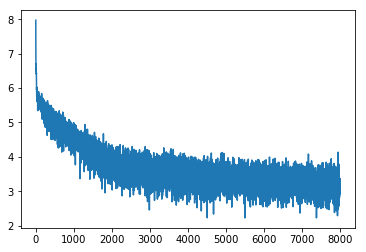

In [21]:
# load solver
solver_losses_name = "李白_5.solver_losses"

with open(solver_losses_name, 'rb') as f:
    all_losses = pickle.load(f)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

## Evaulate

In [ ]:
from solver import Solver

import torch

model_name = "model/11-27_08-56/best_char_rnn.model"
model_load = torch.load(model_name)
solver_load = Solver(model_load, poems, vocab, 
                num_epochs=10000, 
                learning_rate=1e-3, 
                save_every = 1000,
                print_every=100, 
                plot_every=10, 
                verbose=True)

In [ ]:
predicted = solver_load.evaluate(start_with='牀前看月光')
print("length: %d, %s" % (len(predicted), predicted))